# Simple Sinusoid

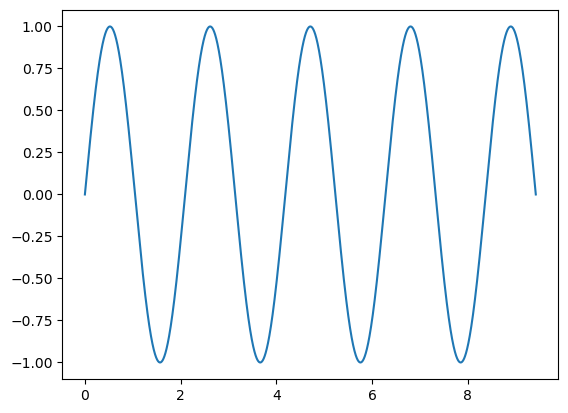

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n = 4000
end = 3*np.pi
window = 30
randNumb = 500

x = np.linspace(0, end, n)
y = np.sin(2*x+x)

plt.plot(x,y)

signal = y

## Hankelize Data

In [2]:
import functions
import numpy as np

L=2000
B = functions.hankelize(signal,L)
np.shape(B)

(2000, 2001)

In [3]:
from sklearn.decomposition import PCA, FastICA
n_components = 6

model1 = PCA(n_components =n_components)
PCs = model1.fit_transform(B).T

model2 = FastICA(n_components =n_components )
ICs = model2.fit_transform(B).T

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


## Here We Apply Ranking and Scaling

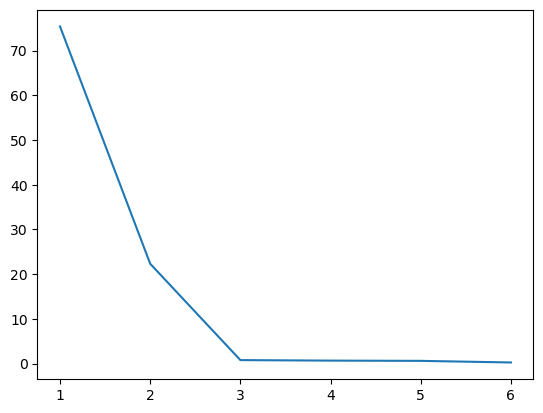

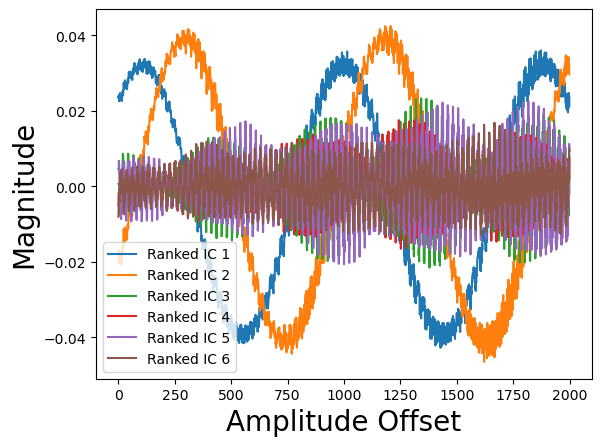

In [4]:
import methods
#Apply Ranking
components = ICs

icRanker = methods.ranker(components,B)
rankedScores = icRanker.scores
rankedComponents = icRanker.outComponents
plt.figure()
plt.plot(range(1,len(rankedScores)+1),rankedScores)

txtsize = 20
plt.figure()
for i in range(n_components):
    plt.plot(rankedComponents[i], label = "Ranked IC {}".format(i+1))
    plt.ylabel("Magnitude", size = txtsize)
    plt.xlabel("Amplitude Offset",size = txtsize)
plt.legend()


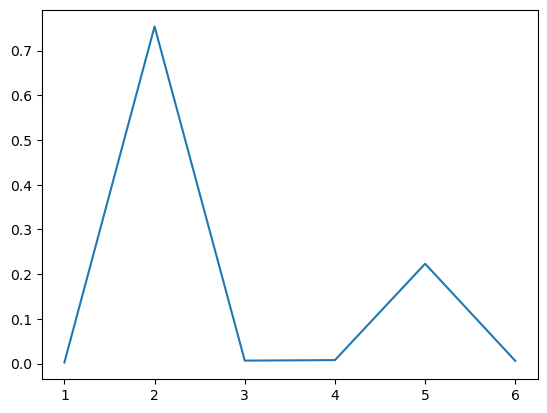

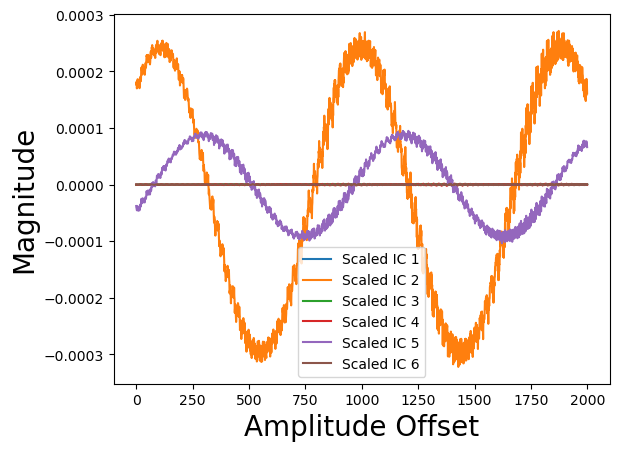

In [5]:
import methods
#Apply Scaling

components = ICs

icScaler = methods.scaler(components,B)
scaledScores = icScaler.scores
scaledComponents = icScaler.outComponents
plt.figure()
plt.plot(range(1,len(rankedScores)+1),scaledScores)

txtsize = 20
plt.figure()
for i in range(n_components):
    plt.plot(scaledComponents[i], label = "Scaled IC {}".format(i+1))
    plt.ylabel("Magnitude", size = txtsize)
    plt.xlabel("Amplitude Offset",size = txtsize)
plt.legend()


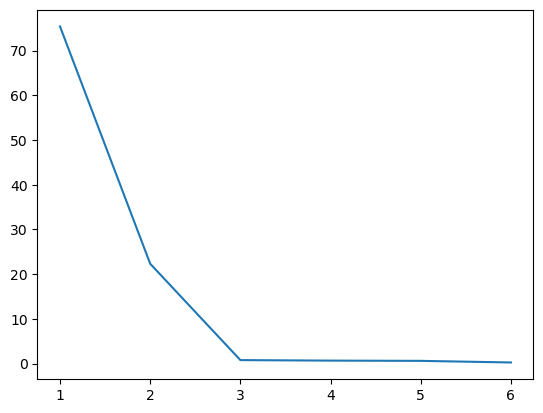

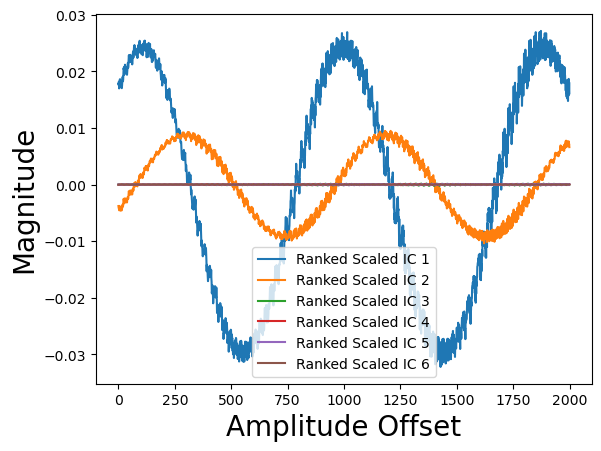

In [6]:
import methods
#Apply Both

components = ICs

icRankScaler = methods.rankedScaler(components,B)
rankscaledScores = icRankScaler.scores
rankscaledComponents = icRankScaler.outComponents
plt.figure()
plt.plot(range(1,len(rankscaledScores)+1),rankscaledScores)

txtsize = 20
plt.figure()
for i in range(n_components):
    plt.plot(rankscaledComponents[i], label = "Ranked Scaled IC {}".format(i+1))
    plt.ylabel("Magnitude", size = txtsize)
    plt.xlabel("Amplitude Offset",size = txtsize)
plt.legend()


## Now We Apply Clustering and Condensing

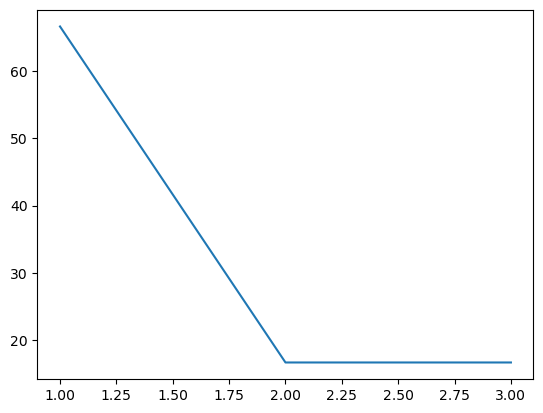

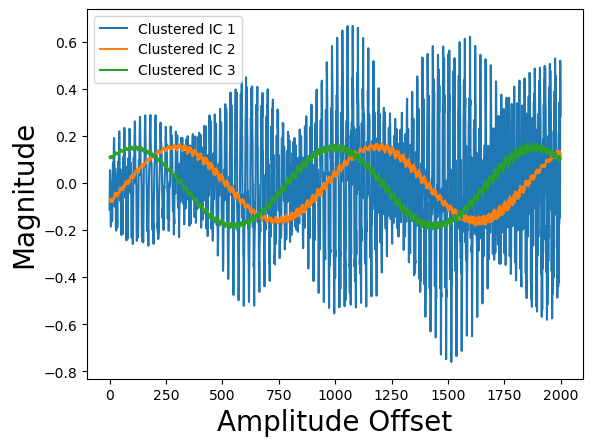

In [7]:
import methods
# Apply Clustering
components = ICs

icCluster = methods.clustering(components,B,3)
clusterScores = icCluster.scores
clusterComponents = icCluster.outComponents
plt.figure()
plt.plot(range(1,len(clusterScores)+1),clusterScores)

plt.figure()
for i in range(len(clusterScores)):
    plt.plot(clusterComponents[i], label = "Clustered IC {}".format(i+1))
    plt.ylabel("Magnitude", size = txtsize)
    plt.xlabel("Amplitude Offset",size = txtsize)
plt.legend()


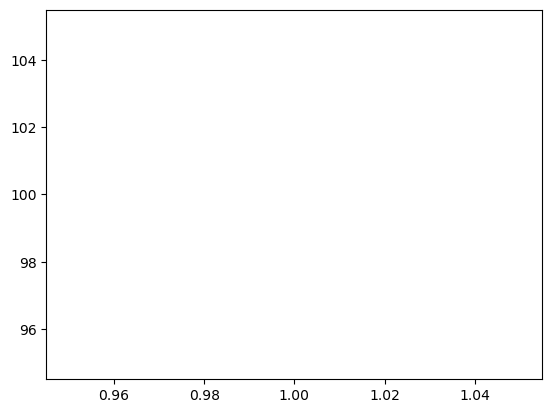

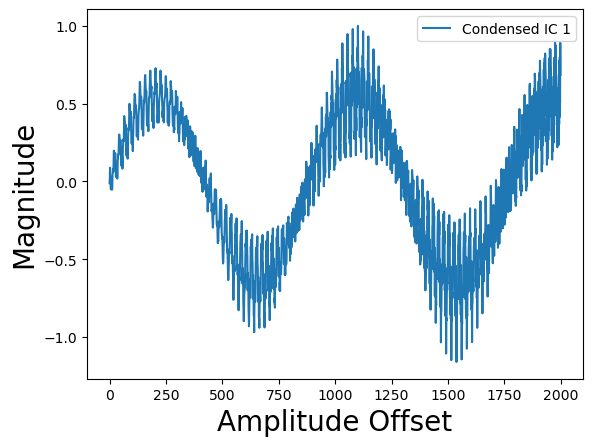

In [8]:
import methods
# Apply Clustering
components = ICs

icCondense = methods.condensing(components,B)
condenseScores = icCondense.scores
condenseComponents = icCondense.outComponents
plt.figure()
plt.plot(range(1,len(condenseScores)+1),condenseScores)

plt.figure()
for i in range(len(condenseScores)):
    plt.plot(condenseComponents[i], label = "Condensed IC {}".format(i+1))
    plt.ylabel("Magnitude", size = txtsize)
    plt.xlabel("Amplitude Offset",size = txtsize)
plt.legend()
